# Taller: Análisis de Instagram con Apify API + Gemini  

Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts (descriptiva de los captions).  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini. Crear Prompt
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [57]:
import pandas as pd
import requests
import google.generativeai as palm

In [58]:
# 🔑 Introduce tu token de Apify y de Google Generative AI (Gemini)
import os

In [59]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv

--2025-11-20 00:57:46--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv [following]
--2025-11-20 00:57:47--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10377469 (9.9M) [text/plain]
Saving to: ‘instagram_disney.csv.2’

instagram_disney.cs 100%[===================>]  

In [60]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv")


In [61]:
df

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,59.179,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.instagram.com/disneylat/,3378657362149709028,disneylat,https://www.instagram.com/p/C7jZvhQsRTk/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,115.115,disneyprincesala,Original audio,True,False,NaN,9.840821e+14,"[{'full_name': 'Disney', 'id': '2957422264', '...","[{'id': '2957422264', 'is_verified': True, 'pr...",NaN
196,https://www.instagram.com/disneylat/,3333366985910424893,disneylat,https://www.instagram.com/p/C5Cf5zdNJU9/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,https://www.instagram.com/disneylat/,3331639585011555501,disneylat,https://www.instagram.com/p/C48XI0APlyt/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,https://www.instagram.com/disneylat/,3329464423368675903,disneylat,https://www.instagram.com/p/C40okC3MNI_/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)
Mire las columnas de su dataset y responda
1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  (mira la columna type)
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [62]:
df.shape

(200, 58)

In [63]:
df["type"].value_counts()

,count
type,
Video,83
Sidecar,67
Image,50


In [64]:
df["date"] = pd.to_datetime(df["timestamp"])

In [65]:
df["date"].min()

Timestamp('2024-03-16 17:00:01+0000', tz='UTC')

In [66]:
df["date"].max()

Timestamp('2025-05-20 21:00:01+0000', tz='UTC')

In [67]:
df[df["likesCount"]==df["likesCount"].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned,date
85,https://www.instagram.com/disneylat/,3506371026641991220,disneylat,https://www.instagram.com/p/DCpId8Ft7Y0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,disneylat,Original audio,True,False,NaN,1.920758e+15,NaN,NaN,NaN,2024-11-21 21:00:02+00:00


In [68]:
df.loc[df["likesCount"].idxmax()]

,85
inputUrl,https://www.instagram.com/disneylat/
id,3506371026641991220
username,disneylat
url,https://www.instagram.com/p/DCpId8Ft7Y0/
fullName,Disney
biography,La cuenta oficial de Disney para Latinoamérica.
externalUrls,[]
followersCount,569613
followsCount,36
hasChannel,False


/tmp/ipython-input-2574326429.py:7: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2574326429.py:7: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


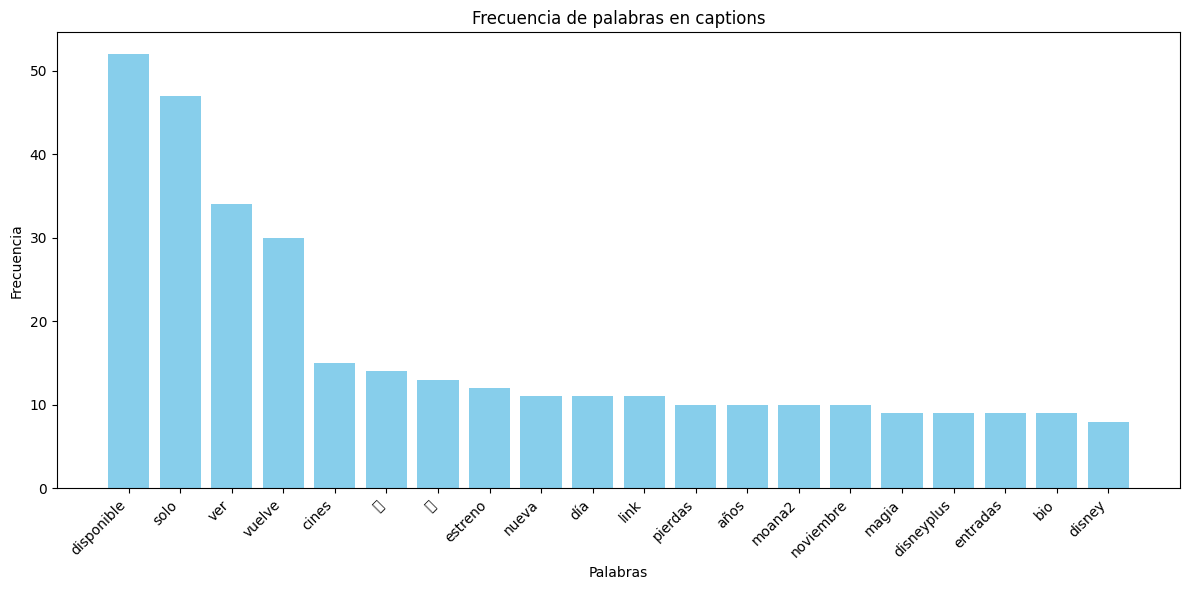

In [81]:
plt.figure(figsize=(12,6))
plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Frecuencia de palabras en captions")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Entregue un grafico de barras con las frecuencia en los captions

In [69]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,caption,caption_clean
0,"En cada imagen se esconde un Mickey, ¿puedes e...",en cada imagen se esconde un mickey ¿puedes en...
1,Esto se va a descontrolar.,esto se va a descontrolar
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,los 2000 hechos canción vuelve a ver lizziemcg...
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,con ser ella misma alcanzaba 🥹 mulán disponibl...
4,"Llevábamos años esperando este momento, y no d...",llevábamos años esperando este momento y no de...



## 🗂 Sección 3 (Temas)
5. Pida a chatgpt o a una IA que le de 3 temas para clasificar un caption y denle un ejemplo.
6. Escriba un prompt en donde le pida clasificar un caption y que de respuesta solo regrese una palabra.
7. Apliquelo en toda la columna caption creando una columna topics.

10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [70]:
import requests
import json

In [71]:
import os
os.environ["OPENAI_API_KEY"] =

from openai import OpenAI

client = OpenAI()

In [72]:
from openai import OpenAI

client = OpenAI()


In [73]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [74]:
call_llm("""Dame 3 temas para poder clasificar un caption del instagram de disney
""")

'Aquí tienes tres temas para clasificar un caption de Instagram de Disney:\n\n1. **Magia y Fantasía**: Captions que evocan la maravilla y la imaginación que ofrecen las historias y personajes de Disney.\n\n2. **Aventura y Amistad**: Frases que resaltan la importancia de la amistad y las aventuras que viven los personajes en los relatos de Disney.\n\n3. **Valores y Enseñanzas**: Mensajes que destacan las lecciones de vida y los valores que transmiten las películas y historias de Disney. \n\n¿Te gustaría ejemplos específicos para alguno de estos temas?'

In [76]:
import time

def classify_caption(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'magia_fantasia', 'amistad_familia' o 'aventuras_diversión' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['caption'] = sample['caption_clean'].apply(classify_caption)

<Axes: xlabel='caption', ylabel='count'>

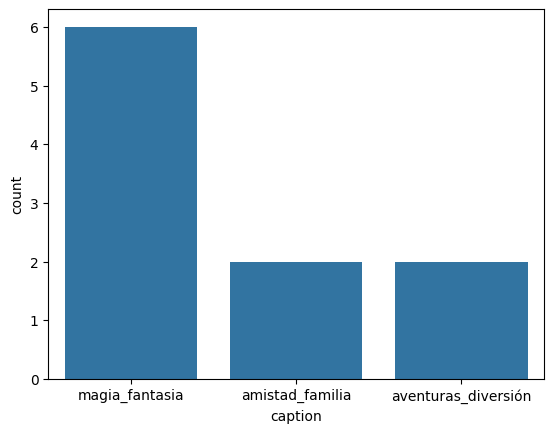

In [77]:
sample['caption'].value_counts()
import seaborn as sns
sns.barplot(sample['caption'].value_counts())

In [82]:
pd.crosstab(sample["type"], sample["caption"])

caption,amistad_familia,aventuras_diversión,magia_fantasia
type,,,
Image,1,0,1
Sidecar,1,2,0
Video,0,0,5


<Axes: xlabel='caption', ylabel='type'>

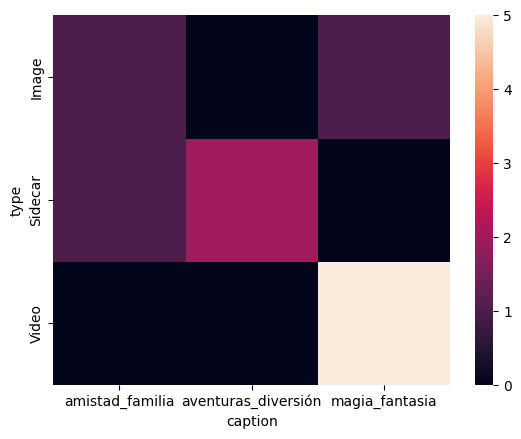

In [79]:
sns.heatmap(pd.crosstab(sample["type"], sample["caption"]))

## Captions

In [86]:
call_llm("""Describe cada cluster en una frase separalo por actividad y tono. damelo en una lista de python con este estilo: "topic": "Image", "actividad": "Muestra imágenes detrás de escenas, creando un ambiente visual atractivo.", "tono": "Informativo y visual.".
caption	amistad_familia	aventuras_diversión	magia_fantasia
type
Image	1	0	1
Sidecar	1	2	0
Video	0	0	5
""")

'Aquí tienes la lista en el formato solicitado:\n\n```python\nclusters = [\n    {\n        "topic": "amistad_familia",\n        "actividad": "Muestra momentos significativos de la vida cotidiana y conexiones familiares.",\n        "tono": "Cálido y emotivo."\n    },\n    {\n        "topic": "aventuras_diversión",\n        "actividad": "Documenta experiencias emocionantes y momentos divertidos al aire libre.",\n        "tono": "Entusiasta y dinámico."\n    },\n    {\n        "topic": "magia_fantasia",\n        "actividad": "Presenta elementos de fantasía que despiertan la imaginación y el asombro.",\n        "tono": "Misterioso y encantador."\n    },\n    {\n        "topic": "imagen",\n        "actividad": "Muestra imágenes detrás de escenas, creando un ambiente visual atractivo.",\n        "tono": "Informativo y visual."\n    },\n    {\n        "topic": "sidecar",\n        "actividad": "Ofrece contenido complementario y reflexiones que enriquecen la narrativa principal.",\n        "ton

In [88]:
lista_tonos=[{"topic": "amistad_familia","actividad": "Muestra momentos significativos de la vida cotidiana y conexiones familiares.","tono": "Cálido y emotivo."},
             {"topic": "aventuras_diversión","actividad": "Documenta experiencias emocionantes y momentos divertidos al aire libre.","tono": "Entusiasta y dinámico."},
             {"topic": "magia_fantasia","actividad": "Presenta elementos de fantasía que despiertan la imaginación y el asombro.","tono": "Misterioso y encantador."}]

In [89]:
def generar_caption(topic, tone):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres "
              f"sobre el tema '{topic}'. Tono {tone}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)

for lista in lista_tonos:
    print(generar_caption(lista["actividad"],lista["tono"]))
    print("_______________")

La belleza de la vida cotidiana está en esos pequeños momentos: risas en la mesa, abrazos largos después de un día difícil y las charlas compartidas al atardecer. Celebremos las conexiones que nos llenan el corazón.
_______________
¡Haz que cada aventura cuente! 📸✨ Documenta esos momentos inolvidables al aire libre: risas, desafíos y paisajes que quitan el aliento. ¡Saca tu cámara y deja que la naturaleza cuente tu historia! 🌳💚
_______________
Sumérgete en un mundo donde el susurro de dragones danza entre las estrellas y los árboles cuentan secretos antiguos. Deja que tus sueños despierten en un rincón mágico, donde lo imposible cobra vida. ¿Te atreves a explorar?
_______________




## 📝 Sección 4 (Micro‑campaña)

Cree una columna para una publicidad especifica:


In [38]:
import pandas as pd

# Lista de diccionarios con la información
datos = [
    {"Nombre": "Ana Torres", "Personaje de Interés": "Estudiante universitaria", "Rango de Edad": "18-24", "Producto a Vender": "Laptop económica"},
    {"Nombre": "Carlos Pérez", "Personaje de Interés": "Emprendedor digital", "Rango de Edad": "25-34", "Producto a Vender": "Software de productividad"},
    {"Nombre": "Lucía Gómez", "Personaje de Interés": "Madre primeriza", "Rango de Edad": "25-34", "Producto a Vender": "Pañales ecológicos"},
    {"Nombre": "Marco Díaz", "Personaje de Interés": "Gamer profesional", "Rango de Edad": "18-24", "Producto a Vender": "Silla ergonómica para gaming"},
    {"Nombre": "Teresa Ríos", "Personaje de Interés": "Ejecutiva de marketing", "Rango de Edad": "35-44", "Producto a Vender": "Cursos de liderazgo online"},
    {"Nombre": "Andrés López", "Personaje de Interés": "Jubilado activo", "Rango de Edad": "65-74", "Producto a Vender": "Viajes culturales guiados"},
    {"Nombre": "Valentina Cruz", "Personaje de Interés": "Influencer de moda", "Rango de Edad": "18-24", "Producto a Vender": "Ropa de diseñador"},
    {"Nombre": "Roberto Silva", "Personaje de Interés": "Dueño de cafetería", "Rango de Edad": "35-44", "Producto a Vender": "Cafetera industrial"},
    {"Nombre": "Elena Fuentes", "Personaje de Interés": "Freelance creativa", "Rango de Edad": "25-34", "Producto a Vender": "Tableta gráfica"},
    {"Nombre": "Javier Ramírez", "Personaje de Interés": "Papá de familia numerosa", "Rango de Edad": "35-44", "Producto a Vender": "Plan de supermercado online"}
]

# Crear el DataFrame
df = pd.DataFrame(datos)

In [39]:
df

,Nombre,Personaje de Interés,Rango de Edad,Producto a Vender
0,Ana Torres,Estudiante universitaria,18-24,Laptop económica
1,Carlos Pérez,Emprendedor digital,25-34,Software de productividad
2,Lucía Gómez,Madre primeriza,25-34,Pañales ecológicos
3,Marco Díaz,Gamer profesional,18-24,Silla ergonómica para gaming
4,Teresa Ríos,Ejecutiva de marketing,35-44,Cursos de liderazgo online
5,Andrés López,Jubilado activo,65-74,Viajes culturales guiados
6,Valentina Cruz,Influencer de moda,18-24,Ropa de diseñador
7,Roberto Silva,Dueño de cafetería,35-44,Cafetera industrial
8,Elena Fuentes,Freelance creativa,25-34,Tableta gráfica
9,Javier Ramírez,Papá de familia numerosa,35-44,Plan de supermercado online


In [92]:
def generar_caption(nombre, topic, personaje, publico):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres, el objetivo es motivarlo a comprar"
              f"para la persona : {nombre } sobre el tema '{topic}' y el personaje {personaje} para un publico de {publico} años.No incluyas hashtags ni menciones.")
    response = call_llm(prompt)
    return response



In [91]:
# Extraemos los valores y aplicamos la función para crear la nueva columna
df['Caption'] = df.apply(lambda row: generar_caption(
    nombre=row['Nombre'],
    topic=row['Producto a Vender'],
    personaje=row['Personaje de Interés'],
    publico=row['Rango de Edad']
), axis=1)

KeyError: 'Nombre'